<a href="https://colab.research.google.com/github/wvirany/stat_learning/blob/dev/auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression and Model Selection

---

Walter Virany

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Reading in Auto data

Auto = pd.read_csv("Auto.csv",
                   na_values=['?'])

Auto.dropna(inplace=True)

In [ ]:
# The LinearRegression from sklearn expects a 2D array for X

X = Auto['horsepower']
X = np.array(X).reshape(-1,1)
y = Auto['mpg']

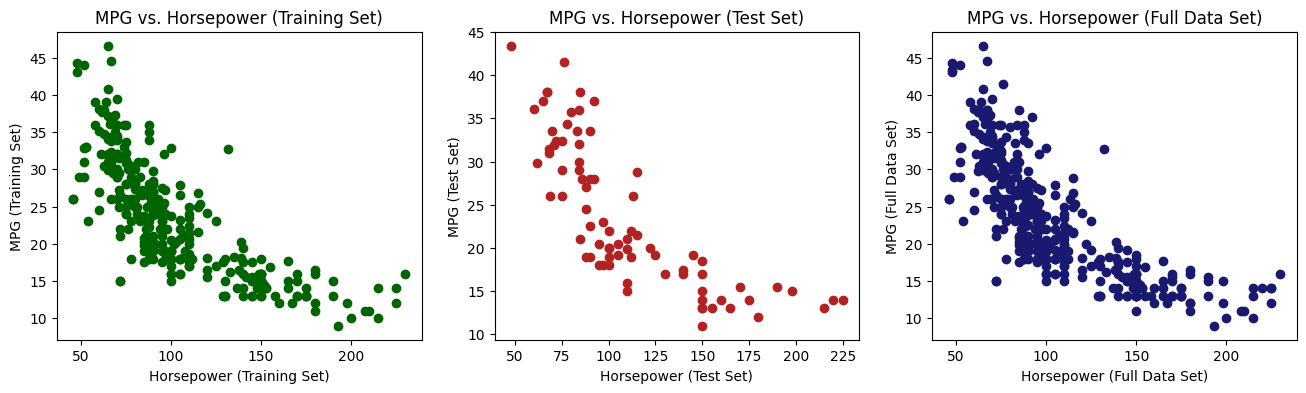

In [ ]:
# It's always a good idea to plot the data first

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

axes[0].scatter(X_train, y_train, c='darkgreen')
axes[0].set_xlabel('Horsepower (Training Set)')
axes[0].set_ylabel("MPG (Training Set)")
axes[0].set_title("MPG vs. Horsepower (Training Set)");

axes[1].scatter(X_test, y_test, c='firebrick')
axes[1].set_xlabel('Horsepower (Test Set)')
axes[1].set_ylabel("MPG (Test Set)")
axes[1].set_title("MPG vs. Horsepower (Test Set)");

axes[2].scatter(X, y, c='midnightblue')
axes[2].set_xlabel('Horsepower (Full Data Set)')
axes[2].set_ylabel("MPG (Full Data Set)")
axes[2].set_title("MPG vs. Horsepower (Full Data Set)");

Let's start by trying a linear model:

In [ ]:
# Splitting our data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("Linear Coefficient:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R squared:", r2_score(y_test, y_pred))

Linear Coefficient: [-0.15790918]
Mean Squared Error: 28.66013202298904
R squared: 0.5865667722428769


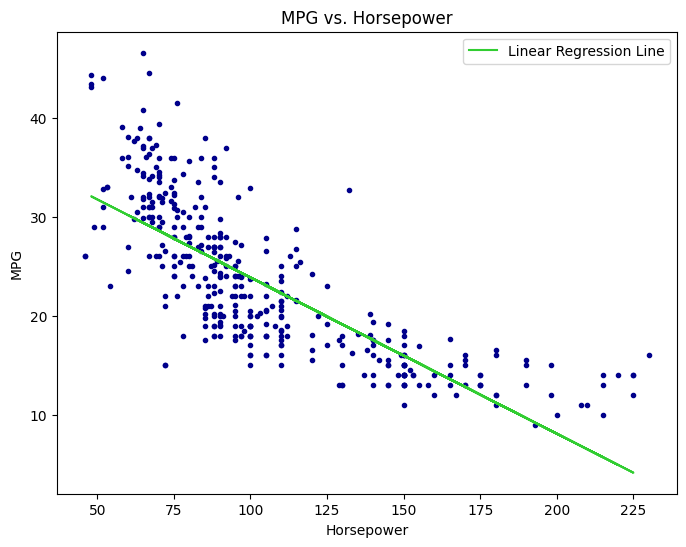

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, marker='.', c='darkblue')
plt.plot(X_test, y_pred, c='limegreen', label='Linear Regression Line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs. Horsepower')
ax.legend();

 *Add residual plot*

So, it seems like there could be a nonlinear relationship. Let's try a new model, with the assumption:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2^2
$$

This is still a linear regression model, with $X_1 =$ `horsepower` and $X_2 =$ `horsepower`$^2$.

In [ ]:
X2 = X**2
X2_train = X_train**2
X2_test = X_test**2